In [1]:
!git clone https://github.com/millermuttu/TSAI-EVA5.git

Cloning into 'TSAI-EVA5'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 85 (delta 22), reused 42 (delta 8), pack-reused 0
Unpacking objects: 100% (85/85), done.


In [2]:
cd /content/TSAI-EVA5/week7

/content/TSAI-EVA5/week7


In [3]:
!ls

models	train_test.py  utils


In [4]:
# Importing torch packages for Neural Network building
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm
from torchsummary import summary
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from models.networks import Net
from utils.img_reg import *
from train_test import *


In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.49139968, 0.48215841, 0.44653091), (0.24703223, 0.24348513, 0.26158784))
     ])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [6]:
mean,std = image_normalization_3(trainset)
mean,std

(array([0.49139968, 0.48215841, 0.44653091]),
 array([0.24703223, 0.24348513, 0.26158784]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  cat  frog  frog  ship


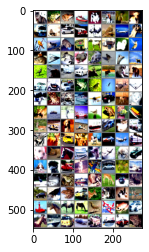

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.49139968     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net(batch_normalization_type="BN").to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 34, 34]           4,608
              ReLU-6           [-1, 32, 34, 34]               0
       BatchNorm2d-7           [-1, 32, 34, 34]              64
           Dropout-8           [-1, 32, 34, 34]               0
            Conv2d-9           [-1, 32, 36, 36]           9,216
             ReLU-10           [-1, 32, 36, 36]               0
      BatchNorm2d-11           [-1, 32, 36, 36]              64
          Dropout-12           [-1, 32, 36, 36]               0
        MaxPool2d-13           [-1, 32, 18, 18]               0
           Conv2d-14           [-1, 32,

In [9]:
def run_models(model, device, epochs, reg, lambda1 = 0.0002, lambda2 = 0.0001):
  train_losses = []
  test_losses = []
  train_acc = []
  test_acc = []
  misclassified_images = []
  model = model.to(device)
  optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
  scheduler = StepLR(optimizer, step_size=20, gamma=0.1)

  for epoch in range(epochs):
      print("EPOCH:", epoch+1)
      train(model, device, trainloader, optimizer, epoch, reg, lambda1, lambda2, train_losses, train_acc)
      scheduler.step()
      if epoch !=50:
        test(model, device, testloader, test_losses, test_acc, misclassified_images)
      else:
        test(model, device, testloader, test_losses, test_acc, misclassified_images, misclassified=True)
  
  return test_losses, test_acc, misclassified_images

In [10]:
#Ghost Batch Norm
gbn_loss, gbn_acc, gbn_misclassified = run_models(Net(), device, 35, "None")

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.5513, Accuracy: 4333/10000 (43.33%)

EPOCH: 2


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2247, Accuracy: 5616/10000 (56.16%)

EPOCH: 3


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1707, Accuracy: 5694/10000 (56.94%)

EPOCH: 4


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0372, Accuracy: 6214/10000 (62.14%)

EPOCH: 5


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0460, Accuracy: 6235/10000 (62.35%)

EPOCH: 6


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9124, Accuracy: 6734/10000 (67.34%)

EPOCH: 7


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7984, Accuracy: 7154/10000 (71.54%)

EPOCH: 8


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7633, Accuracy: 7280/10000 (72.80%)

EPOCH: 9


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7854, Accuracy: 7249/10000 (72.49%)

EPOCH: 10


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7492, Accuracy: 7366/10000 (73.66%)

EPOCH: 11


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7707, Accuracy: 7317/10000 (73.17%)

EPOCH: 12


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6842, Accuracy: 7671/10000 (76.71%)

EPOCH: 13


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6848, Accuracy: 7639/10000 (76.39%)

EPOCH: 14


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6961, Accuracy: 7652/10000 (76.52%)

EPOCH: 15


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7217, Accuracy: 7631/10000 (76.31%)

EPOCH: 16


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6611, Accuracy: 7839/10000 (78.39%)

EPOCH: 17


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6412, Accuracy: 7887/10000 (78.87%)

EPOCH: 18


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6937, Accuracy: 7743/10000 (77.43%)

EPOCH: 19


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6994, Accuracy: 7748/10000 (77.48%)

EPOCH: 20


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7256, Accuracy: 7756/10000 (77.56%)

EPOCH: 21


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6277, Accuracy: 8025/10000 (80.25%)

EPOCH: 22


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6429, Accuracy: 8004/10000 (80.04%)

EPOCH: 23


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6331, Accuracy: 8073/10000 (80.73%)

EPOCH: 24


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6396, Accuracy: 8072/10000 (80.72%)

EPOCH: 25


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6568, Accuracy: 8022/10000 (80.22%)

EPOCH: 26


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6676, Accuracy: 8010/10000 (80.10%)

EPOCH: 27


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6743, Accuracy: 8023/10000 (80.23%)

EPOCH: 28


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6765, Accuracy: 8019/10000 (80.19%)

EPOCH: 29


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7038, Accuracy: 7924/10000 (79.24%)

EPOCH: 30


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6861, Accuracy: 8013/10000 (80.13%)

EPOCH: 31


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6951, Accuracy: 7987/10000 (79.87%)

EPOCH: 32


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6992, Accuracy: 7981/10000 (79.81%)

EPOCH: 33


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7049, Accuracy: 7981/10000 (79.81%)

EPOCH: 34


  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7070, Accuracy: 8001/10000 (80.01%)

EPOCH: 35


Loss=0.163 Batch_id=390 Accuracy=95.49: 100%|██████████| 391/391 [00:21<00:00, 18.54it/s]



Test set: Average loss: 0.7066, Accuracy: 7988/10000 (79.88%)

